<a href="https://colab.research.google.com/github/UlrikeDetective/maps/blob/main/How_to_Get_Administrative_Boundary_Polygons_with_OSMnx_in%C2%A0Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Administrative Boundaries with OSMnx for Urban Planning

This tutorial demonstrates how to use the OSMnx library in Python to retrieve the administrative boundary polygon for a specific urban area, such as a neighborhood. This is a common task in urban planning, geographic analysis, and mapping projects when you need to work with the precise outline of a district or neighborhood.

We'll focus on getting the administrative boundary for Tribeca in Manhattan, New York City, as an example. We'll also explain some of the challenges you might encounter when trying to retrieve polygon geometries for place names and how to overcome them.

## Install necessary libraries

Before we begin, we need to install the required Python libraries: `folium`, `osmnx`, `geopandas`, `pandas`, and `contextily`. These libraries provide the tools for downloading, working with, and visualizing geospatial data.

In [1]:
!pip install folium osmnx geopandas pandas contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 52.0 MB/s eta 0:00:00


## Define tribeca boundary

### Subtask:
Use OSMnx to get the administrative boundary of Tribeca.


## Define Tribeca boundary

Often, when working with urban data, you need the precise geographical boundary of a neighborhood or district. OSMnx can help with this by querying OpenStreetMap data. However, simply geocoding a place name like "Tribeca" might not always return the administrative boundary polygon directly, as a name can be associated with different types of geometries (like points or other features).

Successfully retrieved the administrative boundary polygon for Tribeca, Manhattan, New York.


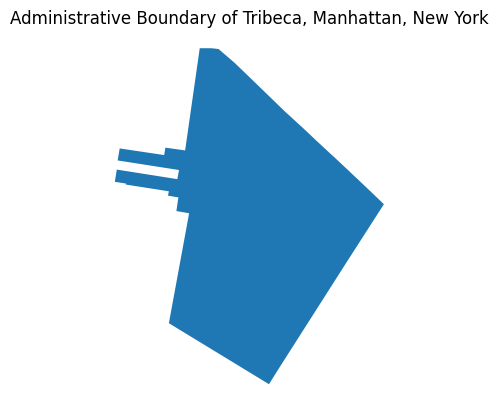


GeoDataFrame containing the Tribeca boundary:


,,geometry,alt_name,alt_name:br,alt_name:pt,alt_name:vi,ele,name,name:ar,name:az,name:be,...,admin_level,alt_name:it,border_type,is_in:country_code,is_in:state,is_in:state_code,name:eu,name:fur,nickname,old_name:hr
element,id,,,,,,,,,,,,,,,,,,,,,
relation,8398119,"POLYGON ((-74.01356 40.7145, -74.01246 40.7190...",NaN,NaN,NaN,NaN,NaN,Tribeca,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Saved the Tribeca boundary to 'tribeca_boundary.shp'
Saved the Tribeca boundary to 'tribeca_boundary.geojson'


/tmp/ipython-input-4176653445.py:49: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  tribeca_boundary_gdf.to_file(output_shapefile, driver='ESRI Shapefile')
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'alt_name:br' to 'alt_name_b'
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'alt_name:pt' to 'alt_name_p'
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'alt_name:vi' to 'alt_name_v'
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'name:ar' to 'name_ar'
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'name:az' to 'name_az'
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyo

In [2]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

# Define the place name for geocoding
place_name = 'Tribeca, Manhattan, New York'

# Step 1: Get a representative point for the place name
# This helps us search for features within or around the area.
tribeca_point = ox.geocode(place_name)

# Step 2: Define the tags for administrative boundaries in OpenStreetMap
# We are looking for features that are administrative boundaries and named 'Tribeca'.
tags = {'boundary': 'administrative', 'name': 'Tribeca'}

# Step 3: Get features around the geocoded point that match the tags
# We use a buffer distance (e.g., 1000 meters) to search around the point.
# Adjust the 'dist' parameter if needed based on the size of the area.
tribeca_features = ox.features_from_point(tribeca_point, tags=tags, dist=1000)

# Step 4: Filter the retrieved features to find the desired administrative boundary polygon
# Administrative boundaries are typically represented as Polygons or MultiPolygons.
# We also filter by the name to ensure we get the correct boundary.
if not tribeca_features.empty:
    tribeca_boundary_gdf = tribeca_features[
        ((tribeca_features.geometry.type == 'Polygon') | (tribeca_features.geometry.type == 'MultiPolygon')) &
        (tribeca_features['name'] == 'Tribeca')
    ]

    # Step 5: Check if a suitable boundary was found and extract its geometry
    if not tribeca_boundary_gdf.empty:
        # We take the first matching polygon if multiple are returned
        tribeca_geometry = tribeca_boundary_gdf.iloc[0].geometry

        # Step 6: Plot the retrieved administrative boundary
        print(f"Successfully retrieved the administrative boundary polygon for {place_name}.")
        fig, ax = plt.subplots()
        tribeca_boundary_gdf.plot(ax=ax)
        ax.set_title(f'Administrative Boundary of {place_name}')
        ax.set_axis_off()
        plt.show()

        # Display the head of the GeoDataFrame for inspection
        print("\nGeoDataFrame containing the Tribeca boundary:")
        display(tribeca_boundary_gdf.head())

        # Step 7: Save the boundary to a shapefile and GeoJSON
        output_shapefile = 'tribeca_boundary.shp'
        tribeca_boundary_gdf.to_file(output_shapefile, driver='ESRI Shapefile')
        print(f"\nSaved the Tribeca boundary to '{output_shapefile}'")

        output_geojson = 'tribeca_boundary.geojson'
        tribeca_boundary_gdf.to_file(output_geojson, driver='GeoJSON')
        print(f"Saved the Tribeca boundary to '{output_geojson}'")


    else:
        print(f"Could not find a suitable administrative boundary polygon for '{place_name}' with the specified criteria (administrative boundary named 'Tribeca').")
        print("Consider adjusting the tags or search distance, or inspecting the 'tribeca_features' GeoDataFrame for available features.")
else:
    print(f"No features found around the point for '{place_name}' with the specified tags.")
    print("Consider increasing the search distance or adjusting the tags.")

**Reasoning**:
To get the administrative boundary polygon, we will first geocode the place name to get a representative point within the area. Then, we will use this point to query OpenStreetMap for features with specific tags that identify administrative boundaries, and finally, filter these features to find the polygon corresponding to "Tribeca". This approach helps overcome the issue where simple geocoding might not directly return the desired polygon geometry.

## Verify the boundary with a basemap

To visually verify that the retrieved administrative boundary polygon for Tribeca is correct, we can plot it on top of a basemap using the `contextily` library. This allows us to see the polygon in its geographical context.

**Reasoning**:
Import `contextily`, then modify the existing plot to add a basemap using `cx.add_basemap` before showing the plot.

Successfully retrieved the administrative boundary polygon for Tribeca, Manhattan, New York.


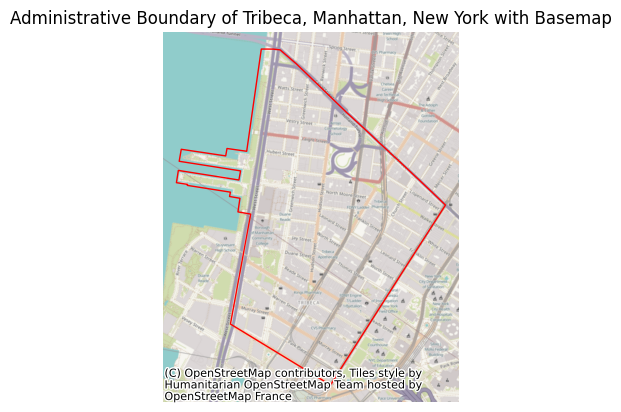

In [3]:
import contextily as cx

# Step 6: Plot the retrieved administrative boundary with a basemap
print(f"Successfully retrieved the administrative boundary polygon for {place_name}.")
fig, ax = plt.subplots()
tribeca_boundary_gdf.plot(ax=ax, facecolor='none', edgecolor='red') # Plotting with no fill and red edge for visibility
cx.add_basemap(ax, crs=tribeca_boundary_gdf.crs) # Add a basemap, ensuring CRS matches
ax.set_title(f'Administrative Boundary of {place_name} with Basemap')
ax.set_axis_off()
plt.show()